In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
r1 = 0.6
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [-3, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

r3 = 0.5
D3 = 1.0
mean3 = [1, 2]
V3 = [[D3, D3 * r3], [D3 * r3, D3]]

# моделирование обучающей выборки
N = 500
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
x3 = np.random.multivariate_normal(mean3, V3, N).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

clf = svm.SVC(kernel='linear')    # SVM с линейным ядром
clf.fit(x_train, y_train)

w1, w2, w3 = clf.coef_[0], clf.coef_[1], clf.coef_[2]
w01, w02, w03 = clf.intercept_[0], clf.intercept_[1], clf.intercept_[2]
w1, w2, w3 = [w01, *w1], [w02, *w2], [w03, *w3]
predict = clf.predict(x_test) # построение прогнозов меток классов для всей выборки
# predict
Q = sum([y != p for y, p in zip(y_test, predict)])
w = [w1, w2, w3]

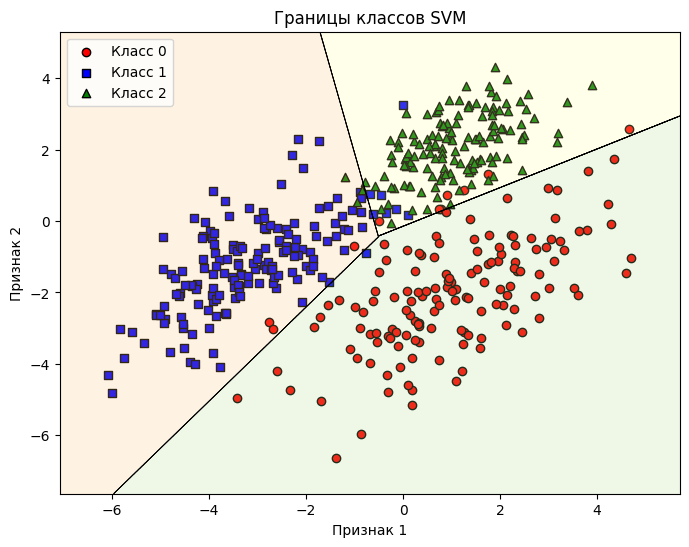

In [3]:
# Визуализация многоклассовой классификации
plt.figure(figsize=(8, 6))

# Разделение данных по классам для отображения
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
labels = ['Класс 0', 'Класс 1', 'Класс 2']

for i in range(3):
    plt.scatter(
        x_test[y_test == i, 0], x_test[y_test == i, 1],
        c=colors[i], marker=markers[i], label=labels[i], edgecolors='k'
    )

# Построение разделяющих гиперплоскостей
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 2000), np.linspace(y_min, y_max, 2000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, levels=np.arange(4) - 0.5, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)

plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Границы классов SVM")
plt.legend()
plt.show()
